<a href="https://colab.research.google.com/github/XescLlabres/tfgFLM/blob/main/WDBC/INT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mitjanes:
TP    0.060525
AP    0.024699
EP    0.035826
dtype: float64


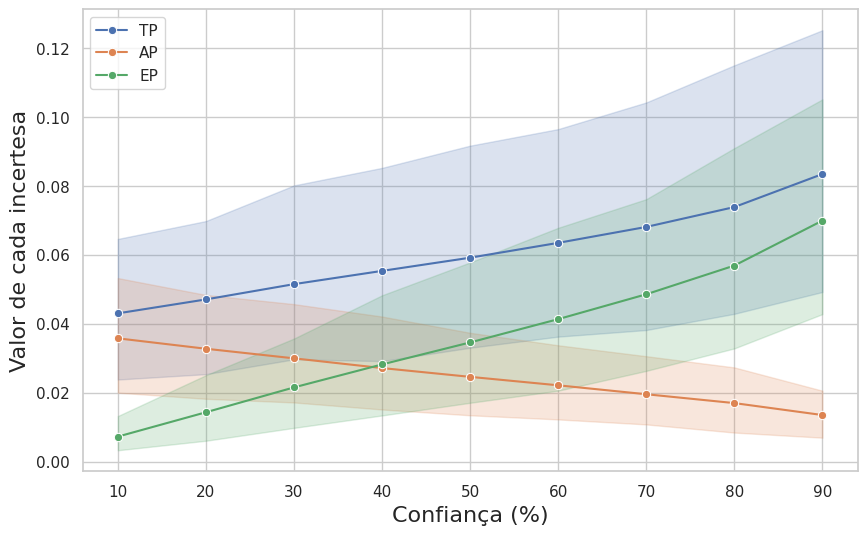

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('prob_id_diag.csv')

id_column = 'id'
diagnosis_column = 'diagnosis'
prob_columns = df.columns[2:]

#carregam les funcions
def calcular_intervalo(probabilidades, li, ls):
    lower_bound = np.percentile(probabilidades, li)
    upper_bound = np.percentile(probabilidades, ls)
    return lower_bound, upper_bound

def calcular_TP(a, b):
    TP = min(1 - a, b)
    return TP

def calcular_AP(a, b):
    AP = min(a, 1 - b)
    return AP

def calcular_EP(a, b):
    EP = b - a
    return EP

#LLista per guradar-los
intervalos_confianza = []

# Definir els intervalos simètrics de percentils: 5-95, 10-90, 15-85, ..., 45-55
saltos_percentiles = [(i, 100-i) for i in range(5, 50, 5)]  # [(5,95), (10,90), (15,85), ..., (45,55)]

# Iterar per cada fila del DataFrame
for index, row in df.iterrows():
    probabilidades = row[prob_columns].values  # Extreure les probabilitats

    for li, ls in saltos_percentiles:
        lower, upper = calcular_intervalo(probabilidades, li, ls)
        intervalos_confianza.append([row[id_column], row[diagnosis_column], li, ls, (ls-li), lower, upper])

# Crear un nou DataFrame amb els intervals de confiança per cada interval simètric
df_intervalos = pd.DataFrame(intervalos_confianza, columns=[id_column, diagnosis_column, 'percentile_lower', 'percentile_upper','confidence', 'lower_bound', 'upper_bound'])


df_intervalos['TP'] = df_intervalos.apply(lambda row: calcular_TP(row['lower_bound'], row['upper_bound']), axis=1)


df_intervalos['AP'] = df_intervalos.apply(lambda row: calcular_AP(row['lower_bound'], row['upper_bound']), axis=1)


df_intervalos['EP'] = df_intervalos.apply(lambda row: calcular_EP(row['lower_bound'], row['upper_bound']), axis=1)

# Calcular mmitjanes de TP, AP i EP
medias = df_intervalos[['TP', 'AP', 'EP']].mean()
print("Mitjanes:")
print(medias)

# Configurar estil de Seaborn
sns.set(style="whitegrid")

# Crear un gràfic per veure com varien TP, AP i EP respecte als percentils
plt.figure(figsize=(10, 6))

# Graficar TP
sns.lineplot(x='confidence', y='TP', data=df_intervalos, label='TP', marker='o')

# Graficar AP
sns.lineplot(x='confidence', y='AP', data=df_intervalos, label='AP', marker='o')

# Graficar EP
sns.lineplot(x='confidence', y='EP', data=df_intervalos, label='EP', marker='o')

# Añadir título y etiquetas
plt.xlabel('Confiança (%)', fontsize=16)
plt.ylabel('Valor de cada incertesa', fontsize=16)

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()
